# Лабораторная работа №4

In [271]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [272]:
data=pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [273]:
data.rename(columns={'male':'sex_male'},inplace=True)
data.head()

,sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [274]:
data.columns

Index(['sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [275]:
data.isnull().sum()

sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [276]:
data.size

67808

In [277]:
data=data.dropna()
data.isnull().sum()

sex_male           0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [278]:
data.corr()

,sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex_male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


In [279]:
print(data.groupby('TenYearCHD').size())

TenYearCHD
0    3099
1     557
dtype: int64


In [280]:
X=data[data.columns]
X=X.drop(columns=['TenYearCHD'])
X.head()

,sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [281]:
Y=data['TenYearCHD']
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [282]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(X,Y)
print(fit.scores_)

[ 17.12043013 295.50776101   7.67979651   0.68691311 156.56731824
  28.15300258   8.49782271  82.96718408  31.02798685 249.15307765
 669.50655224 142.87857382  15.73071703   2.91906232 379.58313716]


In [283]:
X.columns

Index(['sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [284]:
X=data[['age','cigsPerDay','totChol','sysBP','diaBP','glucose']]
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,glucose
0,39,0.0,195.0,106.0,70.0,77.0
1,46,0.0,250.0,121.0,81.0,76.0
2,48,20.0,245.0,127.5,80.0,70.0
3,61,30.0,225.0,150.0,95.0,103.0
4,46,23.0,285.0,130.0,84.0,85.0


In [285]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_x.fit(X)
sc_X = sc_x.transform(X)

In [286]:
X = pd.DataFrame(sc_X, columns = X.columns)

In [287]:
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,glucose
0,-1.233351,-0.757068,-0.949714,-1.193695,-1.078415,-0.203127
1,-0.415591,-0.757068,0.297729,-0.514637,-0.159695,-0.244956
2,-0.181945,0.921174,0.184325,-0.220378,-0.243215,-0.495930
3,1.336754,1.760294,-0.269291,0.798209,1.009584,0.884427
4,-0.415591,1.172910,1.091556,-0.107202,0.090864,0.131505


In [288]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [289]:
from sklearn.neighbors import KNeighborsClassifier

In [340]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=10)

In [341]:
KNeighborsClassifierObj.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [342]:
y_predicted = KNeighborsClassifierObj.predict(x_test)

In [343]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, classification_report, recall_score

In [344]:

accuracy_score(y_test, y_predicted)

0.860655737704918

In [345]:
from sklearn.metrics import confusion_matrix

In [346]:
confusion_matrix(y_test, y_predicted, labels=[0, 1])

array([[620,   7],
       [ 95,  10]], dtype=int64)

In [347]:
precision_score(y_test, y_predicted)

0.5882352941176471

In [348]:
precision_score(y_test, y_predicted, average='weighted')

0.8271270677249462

In [349]:
classification_report(y_test, y_predicted, output_dict = True)

{'0': {'precision': 0.8671328671328671,
  'recall': 0.988835725677831,
  'f1-score': 0.9239940387481371,
  'support': 627},
 '1': {'precision': 0.5882352941176471,
  'recall': 0.09523809523809523,
  'f1-score': 0.1639344262295082,
  'support': 105},
 'accuracy': 0.860655737704918,
 'macro avg': {'precision': 0.7276840806252571,
  'recall': 0.5420369104579631,
  'f1-score': 0.5439642324888226,
  'support': 732},
 'weighted avg': {'precision': 0.8271270677249462,
  'recall': 0.860655737704918,
  'f1-score': 0.8149690943294813,
  'support': 732}}

In [350]:
from sklearn.metrics import roc_curve, roc_auc_score

In [351]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.01116427, 1.        ]),
 array([0.       , 0.0952381, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [352]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

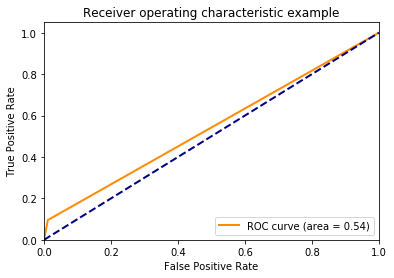

In [355]:
draw_roc_curve(y_test, y_predicted, pos_label=1, average='micro')

In [356]:

from sklearn.model_selection import cross_val_score

In [362]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         x_train, y_train, cv=3)
scores, np.mean(scores)

(array([0.84615385, 0.84307692, 0.84394251]), 0.8443910914547464)

In [363]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         x_train, y_train, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.78570017, 0.78559065, 0.78842061]), 0.786570476970485)

In [364]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [365]:

from sklearn.model_selection import cross_validate

In [367]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=10), 
                        x_train, y_train, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00199366, 0.00299168, 0.00298238]),
 'score_time': array([0.14959955, 0.14162135, 0.14560938]),
 'test_precision': array([0.80248382, 0.7859832 , 0.78878169]),
 'train_precision': array([0.81515087, 0.80793893, 0.83682263]),
 'test_recall': array([0.84615385, 0.84307692, 0.84394251]),
 'train_recall': array([0.84915341, 0.84761416, 0.85333333]),
 'test_f1': array([0.78570017, 0.78559065, 0.78842061]),
 'train_f1': array([0.79430568, 0.79102134, 0.80035567])}

In [368]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [369]:
n_range = np.array(range(5,40,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35])}]

In [370]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=3, scoring='accuracy')
clf_gs.fit(x_train, y_train)

Wall time: 1.15 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [371]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00299311, 0.00199485, 0.00232704, 0.00265924, 0.00299223,
        0.00265932, 0.00265924]),
 'std_fit_time': array([2.74612944e-06, 1.94667955e-07, 4.70471261e-04, 4.70134207e-04,
        2.97360213e-07, 4.70021695e-04, 4.70302724e-04]),
 'mean_score_time': array([0.04455551, 0.04521434, 0.04719599, 0.05219388, 0.05485312,
        0.05751292, 0.05917486]),
 'std_score_time': array([0.00236843, 0.00046924, 0.00045496, 0.00047019, 0.00081439,
        0.00093993, 0.0004703 ]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30},
  {'n_neighbors': 35}],
 'split0_test_score': array([0.83076923, 0.84615385, 0.84410256, 0.84717949, 0.84820513,
        0.84717949, 0.84717949]),
 'split1_

In [372]:
# Лучшая модель
clf_gs.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [373]:
# Лучшее значение метрики
clf_gs.best_score_

0.8471272229822161

In [374]:
# Лучшее значение параметров
clf_gs.best_params_


{'n_neighbors': 25}

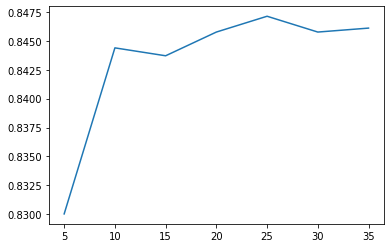

In [375]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])